In [1]:
#Import packages
import geopy
from geopy.geocoders import Nominatim
from geopy.distance import distance
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from shapely import wkt
import csv
from pathlib import Path
from shapely.geometry import Point, Polygon, LinearRing

In [2]:
#import functions (Assignment_2_Functions.py) we write in group_assignment2
import os
os.chdir('../group_assignment2')
from Assignment_2_Functions import *

In [3]:
locations_alameda = pd.read_csv("../group_assignment2/grid_points_alameda.csv")
stations = pd.read_csv("../group_assignment4/Intermediate_data/stations_ca.csv")

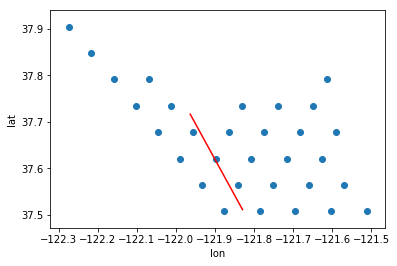

In [12]:
#scatter plot of grid points overlaying Alameda to get the shape of Alameda
plt.scatter(locations_alameda.lon, locations_alameda.lat)
plt.plot([-121.963152, -121.829412], [37.716442, 37.511408], c = 'red')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show();

## Rule for spliting grid points in Alameda county into eastern and western part
The red line are drawn using two most eastern point in zip code 94552 and 94539 from Google Map. The point in 94552 is near Walsh Pocket, and the point in 94539 is near Sunol Regional Wilderness. We then connect this two point with a red line, and classifies all grid points to the left as the western part of Alameda, and all grid points to the right as the eastern part of Alameda. The way we draw our grid points is that the first grid points is the upper left one, then we go down to the next point, and once the first "column" is complete we move the the second "column" of points, until all "columns" are complete. Please refer to group_assignment2/find_grid_points.ipynb for our method of drawing grid points. This indicates that 1 - 11 grid points belong to western Alameda, and the rest grid points are eastern Alameda. 

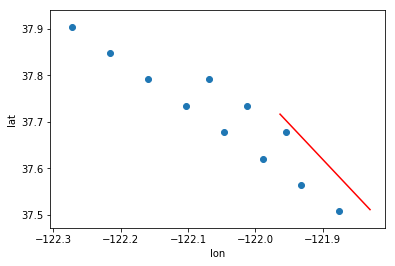

In [11]:
west_alameda = locations_alameda.loc[0:10, :]
plt.scatter(west_alameda.lon, west_alameda.lat)
plt.plot([-121.963152, -121.829412], [37.716442, 37.511408], c = 'red')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show();

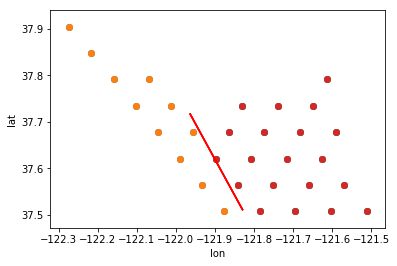

In [10]:
east_alameda = locations_alameda.loc[11:,:]
plt.scatter(east_alameda.lon, east_alameda.lat)
plt.plot([-121.963152, -121.829412], [37.716442, 37.511408], c = 'red')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show();

In [7]:
stations_lat = stations['LATITUDE']
stations_lon = stations['LONGITUDE']

#Get index of weather stations within 10 miles of West Alameda using function 'within_alameda'
mask = [within_alameda(10, lat, lon, west_alameda) for lat, lon in zip(stations_lat, stations_lon)]

#Extract weather stations within 10 miles of West Alameda
stations_within_10miles_west_alameda = stations.loc[mask]
stations_within_10miles_west_alameda.head()

#number of weather stations within 10 miles of West Alameda
len(stations_within_10miles_west_alameda)

76

In [8]:
#Get index of weather stations within 10 miles of East Alameda using function 'within_alameda'
mask = [within_alameda(10, lat, lon, east_alameda) for lat, lon in zip(stations_lat, stations_lon)]

#Extract weather stations within 10 miles of East Alameda
stations_within_10miles_east_alameda = stations.loc[mask]
stations_within_10miles_east_alameda.head()

#number of weather stations within 10 miles of East Alameda
len(stations_within_10miles_east_alameda)

30

In [9]:
#save to csv for later use
stations_within_10miles_east_alameda.iloc[:,1:].to_csv("../group_assignment4/Intermediate_data/stations_10miles_east.csv")
stations_within_10miles_west_alameda.iloc[:,1:].to_csv("../group_assignment4/Intermediate_data/stations_10miles_west.csv")
east_alameda.to_csv("../group_assignment4/Intermediate_data/grid_10miles_east.csv")
west_alameda.to_csv("../group_assignment4/Intermediate_data/grid_10miles_west.csv")